In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
data = pd.read_csv('data/assignment_data.csv', sep=';')

In [52]:
data.shape

(2572, 55)

In [53]:
data.columns

Index([u'country_id', u'application_id', u'product_id', u'Variable_1',
       u'Variable_2', u'Variable_3', u'Variable_4', u'Variable_5',
       u'Variable_6', u'Variable_7', u'due_date', u'first_status_day_date',
       u'first_status_time_of_day', u'paid_date', u'Variable_8',
       u'customer_id', u'arrived_date', u'Variable_9', u'Variable_10',
       u'Variable_11', u'Variable_12', u'Variable_13', u'Variable_14',
       u'Variable_15', u'Variable_16', u'Variable_17', u'Variable_18',
       u'Variable_19', u'Variable_20', u'Variable_21', u'Variable_22',
       u'Variable_23', u'Variable_24', u'Variable_25', u'Variable_26',
       u'Variable_27', u'Variable_28', u'Variable_29', u'Variable_30',
       u'Variable_31', u'Variable_32', u'Variable_33', u'Variable_34',
       u'Variable_35', u'Variable_36', u'Variable_37', u'Variable_38',
       u'Variable_39', u'Variable_40', u'Variable_41', u'Variable_42',
       u'Variable_43', u'Variable_44', u'Variable_45', u'Target'],
      dtype='ob

In [54]:
ids = ['country_id','application_id','product_id','customer_id']
dates = ['due_date','first_status_day_date','first_status_time_of_day','paid_date','arrived_date','Variable_42','Variable_43','Variable_44']
categoricals = ['Variable_5','Variable_6','Variable_12','Variable_45']
ordinals = ['Variable_13','Variable_14']
numericals = [x for x in data.columns if (x not in ids) and (x not in dates) and (x not in categoricals) and (x not in ordinals) and x != 'Target']

In [55]:
data.describe()

,country_id,application_id,product_id,Variable_1,Variable_2,Variable_3,Variable_4,Variable_6,Variable_7,Variable_8,...,Variable_33,Variable_34,Variable_35,Variable_36,Variable_37,Variable_38,Variable_39,Variable_40,Variable_41,Target
count,2572.0,2572.000000,2572.0,2572.000000,2572.000000,2572.0,2572.000000,2537.000000,2571.000000,2572.000000,...,2388.0,2388.0,2388.000000,2388.000000,1472.000000,582.000000,815.000000,2388.000000,2388.000000,2057.000000
mean,21.0,63414.942457,21210001.0,33.641913,1.301322,1.0,1.000778,49.090658,32.246597,193.284992,...,0.0,0.0,0.087940,0.025544,32898.739810,5420.609966,3471.501840,0.184255,0.004188,0.692270
std,0.0,22113.941599,0.0,9.089623,0.714760,0.0,0.027880,26.176144,11.531376,110.996680,...,0.0,0.0,0.416226,0.157805,41066.489101,8791.836300,7977.484235,0.446054,0.064590,0.461666
min,21.0,24176.000000,21210001.0,7.000000,1.000000,1.0,1.000000,1.000000,18.000000,0.000000,...,0.0,0.0,0.000000,0.000000,100.000000,300.000000,100.000000,0.000000,0.000000,0.000000
25%,21.0,44761.500000,21210001.0,30.000000,1.000000,1.0,1.000000,27.000000,24.000000,100.000000,...,0.0,0.0,0.000000,0.000000,5000.000000,1300.000000,300.000000,0.000000,0.000000,0.000000
50%,21.0,66149.000000,21210001.0,30.000000,1.000000,1.0,1.000000,49.000000,29.000000,199.000000,...,0.0,0.0,0.000000,0.000000,17321.000000,3000.000000,639.000000,0.000000,0.000000,1.000000
75%,21.0,82132.000000,21210001.0,30.000000,1.000000,1.0,1.000000,70.000000,38.000000,199.000000,...,0.0,0.0,0.000000,0.000000,47566.500000,5000.000000,2600.000000,0.000000,0.000000,1.000000
max,21.0,98862.000000,21210001.0,60.000000,10.000000,1.0,2.000000,99.000000,86.000000,500.000000,...,0.0,0.0,8.000000,1.000000,467048.000000,94670.000000,76541.000000,4.000000,1.000000,1.000000


In [56]:
data.head()

,country_id,application_id,product_id,Variable_1,Variable_2,Variable_3,Variable_4,Variable_5,Variable_6,Variable_7,...,Variable_37,Variable_38,Variable_39,Variable_40,Variable_41,Variable_42,Variable_43,Variable_44,Variable_45,Target
0,21,24176,21210001,35,1,1,1,N,72.0,27.0,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,14/06/2013,F,1.0
1,21,24185,21210001,30,1,1,1,N,25.0,26.0,...,40147.0,NaN,100.0,0.0,0.0,NaN,NaN,NaN,M,1.0
2,21,24215,21210001,30,1,1,1,N,65.0,21.0,...,499.0,NaN,300.0,0.0,0.0,NaN,NaN,NaN,F,0.0
3,21,24220,21210001,30,1,1,1,N,65.0,48.0,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,F,1.0
4,21,24255,21210001,30,2,1,1,N,4.0,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,1.0


# Missing Data

In [7]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Emptyness Percentage'])
missing_data.head(10)

,Total,Emptyness Percentage
Variable_42,2463,0.957621
Variable_43,2424,0.942457
Variable_44,2371,0.921851
Variable_21,1990,0.773717
Variable_38,1990,0.773717
Variable_22,1757,0.683126
Variable_39,1757,0.683126
Variable_37,1100,0.427683
Variable_20,1100,0.427683
Target,515,0.200233


Conclusion: consider to remove comumns for which emptyness is >= 90%

# Target Exploration

In [8]:
data['Target'].value_counts(dropna=False)

 1.0    1424
 0.0     633
NaN      515
Name: Target, dtype: int64

The 512 unknown are the rows whose prediction I will return to Ferratum

# Categorical Exploration

In [9]:
data[categoricals].dtypes

Variable_5      object
Variable_6     float64
Variable_12    float64
Variable_45     object
dtype: object

In [10]:
pd.crosstab(data['Variable_5'], data.Target, normalize='index')

Target,0.0,1.0
Variable_5,,
N,0.30773,0.69227


In [11]:
pd.crosstab(data['Variable_6'], data.Target, normalize='index').head(10)

Target,0.0,1.0
Variable_6,,
1.0,0.350000,0.650000
2.0,0.555556,0.444444
3.0,0.500000,0.500000
4.0,0.333333,0.666667
6.0,0.240000,0.760000
7.0,0.111111,0.888889
8.0,0.000000,1.000000
9.0,0.285714,0.714286
10.0,0.210526,0.789474


In [12]:
pd.crosstab(data['Variable_12'], data.Target, normalize='index')

Target,0.0,1.0
Variable_12,,
0.0,0.151671,0.848329
15.0,0.348189,0.651811
22.5,0.181818,0.818182
31.5,0.000000,1.000000
45.0,0.349442,0.650558
99.0,0.321267,0.678733


In [13]:
pd.crosstab(data['Variable_45'], data.Target, normalize='index')

Target,0.0,1.0
Variable_45,,
?,0.285714,0.714286
F,0.285124,0.714876
M,0.320242,0.679758


Conclusion: categorical variables are already encoded into integers except: 
- Variable_45 that inddicates the sex, change ? with unknown
- Variable_5 has only value N

# Numerical features

In [14]:
#Check outliars Z score?
#What to do with correlated features

# Ordinal Features

In [15]:
ordinals

['Variable_13', 'Variable_14']

In [16]:
data.Variable_13.value_counts()

G    447
H    414
I    318
M    312
F    278
L    161
E    146
K    125
D    113
B     91
C     74
A     28
Name: Variable_13, dtype: int64

In [17]:
data.Variable_14.value_counts()

RATINGSTUFE G    447
RATINGSTUFE H    414
RATINGSTUFE I    318
RATINGSTUFE M    312
RATINGSTUFE F    278
RATINGSTUFE L    161
RATINGSTUFE E    146
RATINGSTUFE K    125
RATINGSTUFE D    113
RATINGSTUFE B     91
RATINGSTUFE C     74
RATINGSTUFE A     28
Name: Variable_14, dtype: int64

# Date Features

In [18]:
dates

['due_date',
 'first_status_day_date',
 'first_status_time_of_day',
 'paid_date',
 'arrived_date',
 'Variable_42',
 'Variable_43',
 'Variable_44']

In [19]:
for date in dates:
    data[date] = pd.to_datetime(data[date])

In [34]:
data[data.paid_date > data.due_date].shape

(532, 55)

In [35]:
data[data.paid_date > data.arrived_date].shape

(1859, 55)

In [43]:
data[dates + ['Target']].head()

,due_date,first_status_day_date,first_status_time_of_day,paid_date,arrived_date,Variable_42,Variable_43,Variable_44,Target,Target,Target,Target
0,2015-07-07,2015-01-06,2019-04-06 00:43:22,2015-02-06,2015-01-06 00:43:00,NaT,NaT,2013-06-14,1.0,1.0,1.0,1.0
1,2015-02-07,2015-01-06,2019-04-06 07:56:36,2015-02-06,2015-01-06 07:56:00,NaT,NaT,NaT,1.0,1.0,1.0,1.0
2,2015-02-07,2015-01-06,2019-04-06 11:02:04,2015-02-06,2015-01-06 11:02:00,NaT,NaT,NaT,0.0,0.0,0.0,0.0
3,2015-07-17,2015-01-06,2019-04-06 11:22:37,2015-06-17,2015-01-06 11:22:00,NaT,NaT,NaT,1.0,1.0,1.0,1.0
4,2015-02-07,2015-01-06,2019-04-06 15:27:18,2015-02-06,2015-01-06 15:27:00,NaT,NaT,NaT,1.0,1.0,1.0,1.0


In [20]:
data[dates].head()

,due_date,first_status_day_date,first_status_time_of_day,paid_date,arrived_date,Variable_42,Variable_43,Variable_44
0,2015-07-07,2015-01-06,2019-04-06 00:43:22,2015-02-06,2015-01-06 00:43:00,NaT,NaT,2013-06-14
1,2015-02-07,2015-01-06,2019-04-06 07:56:36,2015-02-06,2015-01-06 07:56:00,NaT,NaT,NaT
2,2015-02-07,2015-01-06,2019-04-06 11:02:04,2015-02-06,2015-01-06 11:02:00,NaT,NaT,NaT
3,2015-07-17,2015-01-06,2019-04-06 11:22:37,2015-06-17,2015-01-06 11:22:00,NaT,NaT,NaT
4,2015-02-07,2015-01-06,2019-04-06 15:27:18,2015-02-06,2015-01-06 15:27:00,NaT,NaT,NaT


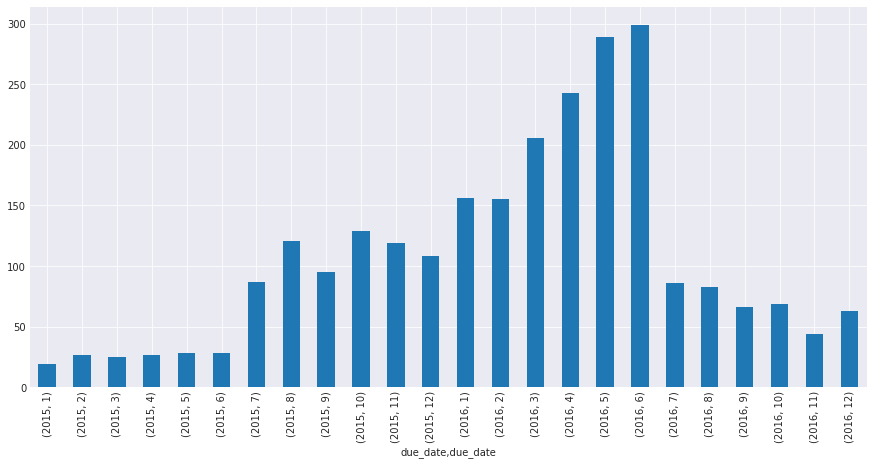

In [21]:
plt.figure(figsize=(15,7))
data.groupby([data['due_date'].dt.year, data['due_date'].dt.month])['due_date'].count().plot(kind="bar")

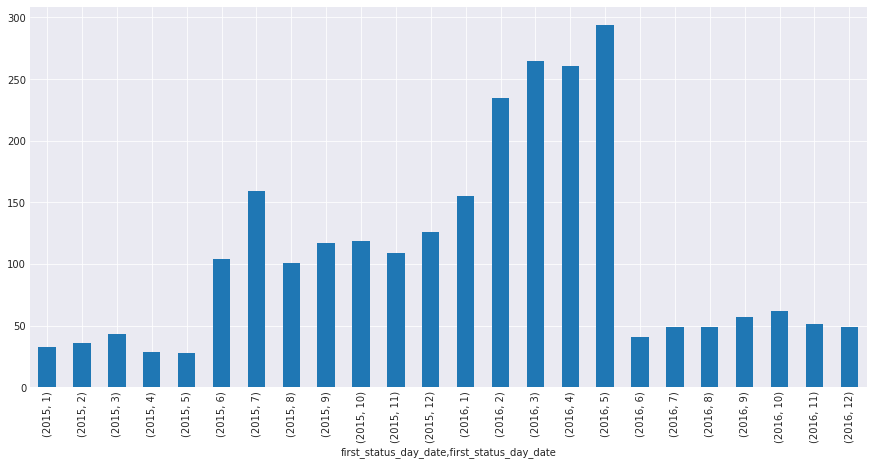

In [22]:
plt.figure(figsize=(15,7))
data.groupby([data['first_status_day_date'].dt.year, data['first_status_day_date'].dt.month])['first_status_day_date'].count().plot(kind="bar")

In [23]:
data['first_status_day_date'].head()

0   2015-01-06
1   2015-01-06
2   2015-01-06
3   2015-01-06
4   2015-01-06
Name: first_status_day_date, dtype: datetime64[ns]

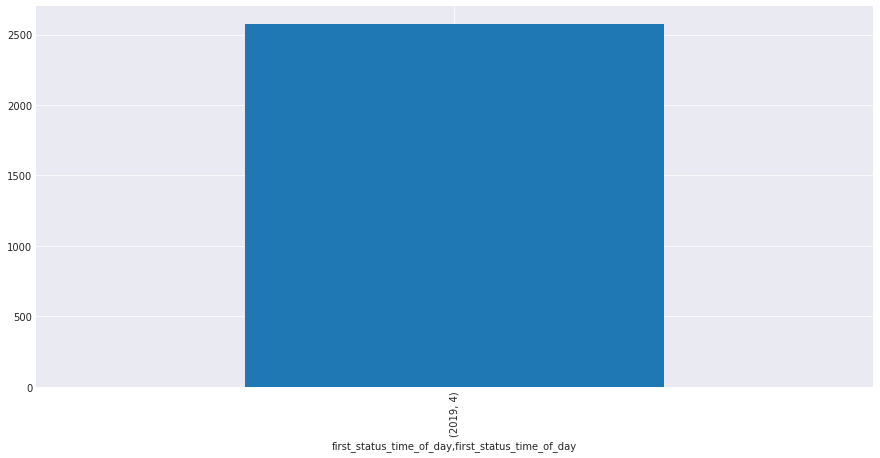

In [24]:
plt.figure(figsize=(15,7))
data.groupby([data['first_status_time_of_day'].dt.year, data['first_status_time_of_day'].dt.month])['first_status_time_of_day'].count().plot(kind="bar")

In [25]:
data['first_status_time_of_day'].value_counts().head()

2019-04-06 13:31:13    3
2019-04-06 10:22:35    2
2019-04-06 17:23:41    2
2019-04-06 16:29:13    2
2019-04-06 15:15:25    2
Name: first_status_time_of_day, dtype: int64

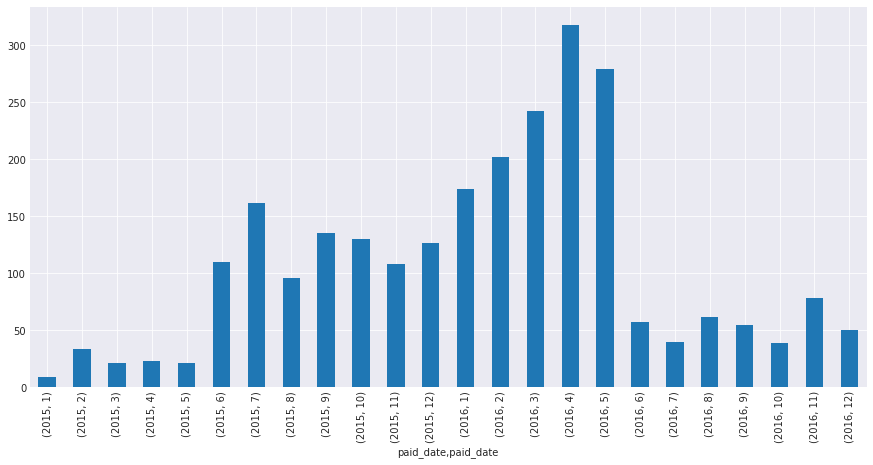

In [26]:
plt.figure(figsize=(15,7))
data.groupby([data['paid_date'].dt.year, data['paid_date'].dt.month])['paid_date'].count().plot(kind="bar")

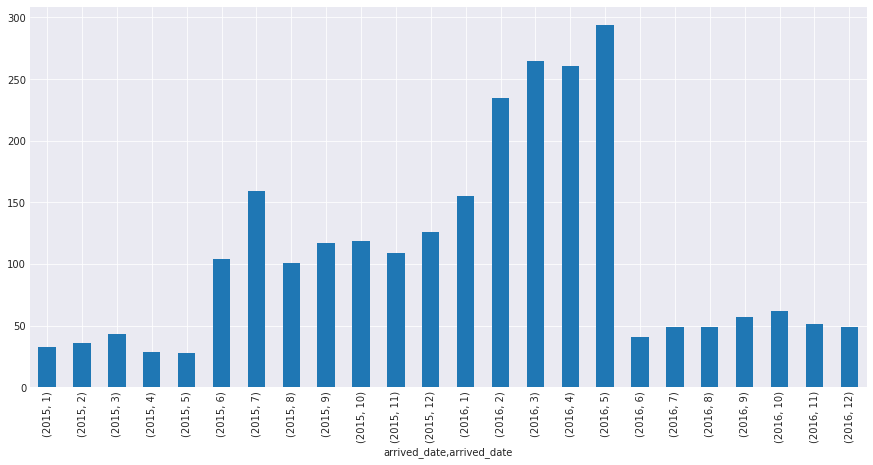

In [27]:
plt.figure(figsize=(15,7))
data.groupby([data['arrived_date'].dt.year, data['arrived_date'].dt.month])['arrived_date'].count().plot(kind="bar")

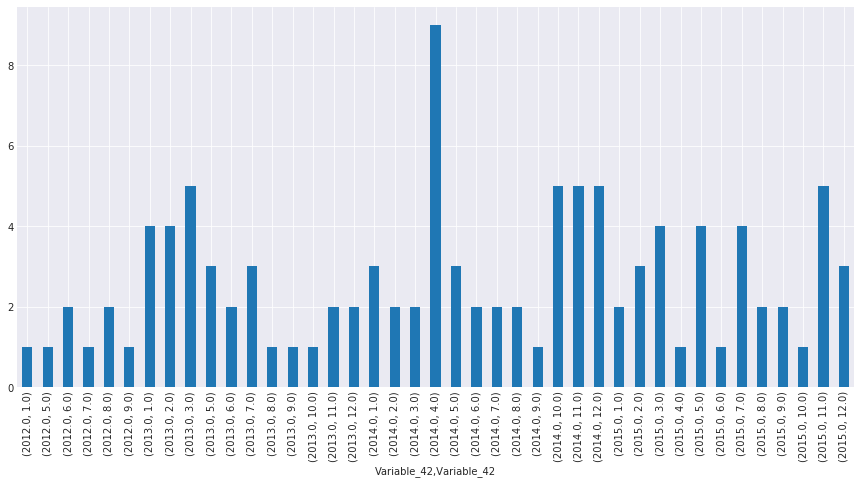

In [28]:
plt.figure(figsize=(15,7))
data.groupby([data['Variable_42'].dt.year, data['Variable_42'].dt.month])['Variable_42'].count().plot(kind="bar")

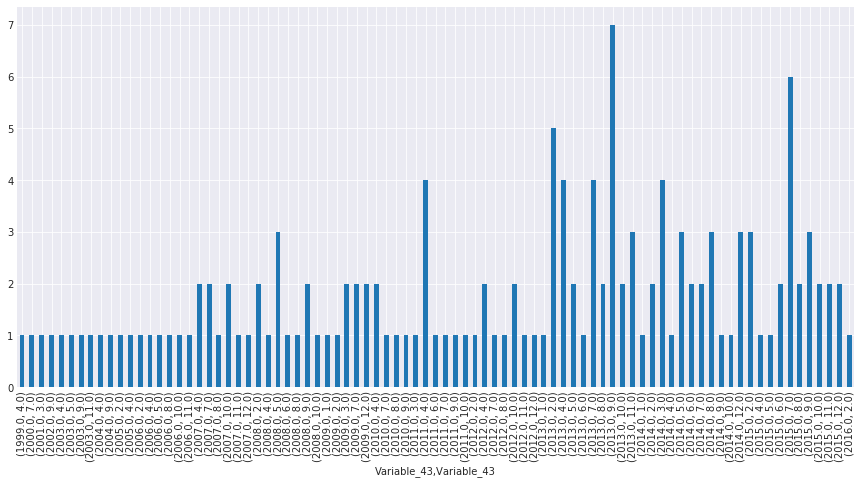

In [29]:
plt.figure(figsize=(15,7))
data.groupby([data['Variable_43'].dt.year, data['Variable_43'].dt.month])['Variable_43'].count().plot(kind="bar")

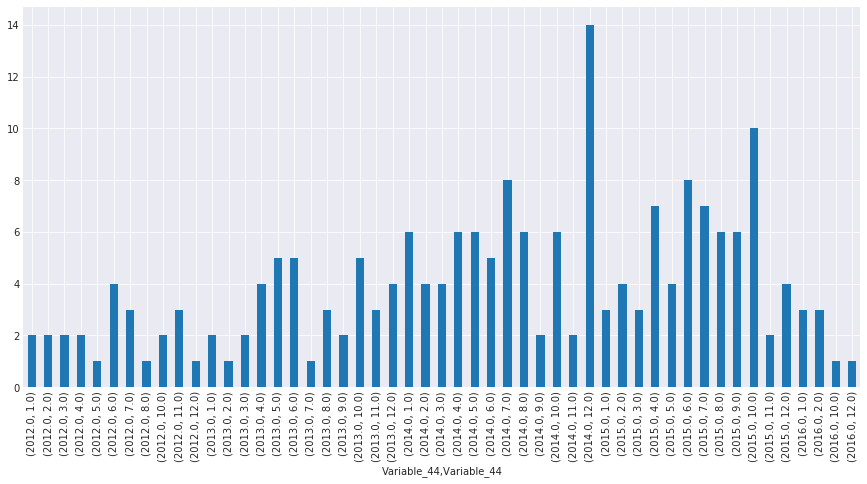

In [30]:
plt.figure(figsize=(15,7))
data.groupby([data['Variable_44'].dt.year, data['Variable_44'].dt.month])['Variable_44'].count().plot(kind="bar")

Conclusion: first_status_time_of_day happens the same day take the hours

# IDs

In [31]:
ids

['country_id', 'application_id', 'product_id', 'customer_id']

In [32]:
data.shape

(2572, 55)

In [51]:
data.country_id.nunique()

1

In [50]:
data.application_id.nunique()

2572

In [52]:
data.product_id.nunique()

1

In [53]:
data.customer_id.nunique()

2572

In [60]:
data.groupby(['application_id','customer_id']).last().shape

(2572, 53)

Conclusion: country_id and product_id are all the time the same. The couples customer_id and product_id are unique. Drop them before training